/Users/pedro_victor/anaconda3/lib/python3.11/site-packages/osmnx/graph.py:191: FutureWarning: The expected order of coordinates in `bbox` will change in the v2.0.0 release to `(left, bottom, right, top)`.
  G = graph_from_bbox(


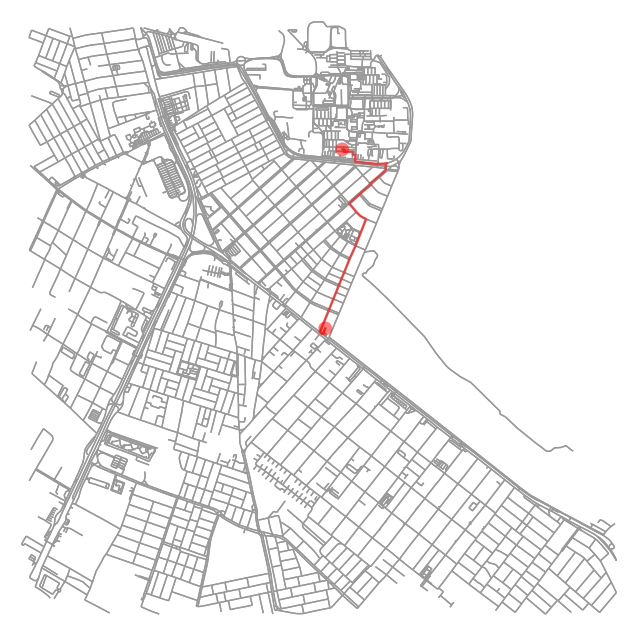

In [45]:
import osmnx as ox
import networkx as nx
import matplotlib.pyplot as plt

# Coordenadas de Natal-RN e pontos de interesse
start_point = (-5.8534904, -35.2005155)
end_point = (-5.842744985132886, -35.199411305349514)

# Baixar o grafo da área de Natal-RN (definido em torno do ponto inicial)
G = ox.graph_from_point(start_point, dist=2000, network_type='walk')

# Encontrar os nós mais próximos dos pontos inicial e final
orig_node = ox.distance.nearest_nodes(G, X=start_point[1], Y=start_point[0])
dest_node = ox.distance.nearest_nodes(G, X=end_point[1], Y=end_point[0])

# Calcular o caminho mais curto entre os nós
shortest_path = nx.shortest_path(G, orig_node, dest_node, weight='length')

# Plotar o grafo e o caminho mais curto
fig, ax = ox.plot_graph_route(G, shortest_path, route_linewidth=2, node_size=0, bgcolor='w')
plt.show()

In [47]:
# Cálculo de métricas de rede

# Número de componentes conectados
num_connected_components = nx.number_connected_components(G.to_undirected())
print(f"Número de componentes conectados: {num_connected_components}")

# Tamanho do maior componente conectado (Giant Connected Component)
largest_cc = max(nx.connected_components(G.to_undirected()), key=len)
G_largest_cc = G.subgraph(largest_cc)
print(f"Tamanho do maior componente conectado: {len(largest_cc)}")

# Comprimento médio do caminho mais curto
avg_shortest_path_length = nx.average_shortest_path_length(G_largest_cc)
print(f"Comprimento médio do caminho mais curto: {avg_shortest_path_length:.2f}")

# Diâmetro da rede (somente para componentes conectados)
diameter = nx.diameter(G_largest_cc)
print(f"Diâmetro da rede: {diameter}")

# Coeficiente de aglomeração (clustering coefficient)
clustering_coefficient = nx.average_clustering(G_largest_cc)
print(f"Coeficiente de aglomeração médio: {clustering_coefficient:.2f}")

# Caminho mais curto calculado (distância total em metros)
path_length = nx.shortest_path_length(G, orig_node, dest_node, weight='length')
print(f"Distância do caminho mais curto: {path_length:.2f} metros")

# Ciclos na rede (usando ciclos simples com um limite de tamanho arbitrário, por exemplo, 6)
cycles = list(nx.simple_cycles(G_largest_cc.to_directed()))
print(f"Número de ciclos detectados no maior componente conectado: {len(cycles)}")

Número de componentes conectados: 1
Tamanho do maior componente conectado: 3506
Comprimento médio do caminho mais curto: 29.86
Diâmetro da rede: 69


NetworkXNotImplemented: not implemented for multigraph type